In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests as r

## Munging Data

In [15]:
df = pd.read_csv('ava-raw.csv')

In [16]:
df.dtypes

Unnamed: 0                           int64
Accident and Rescue Summary:        object
Aspect:                             object
Avalanche Problem:                  object
Avalanche Type:                     object
Buried - Fully:                    float64
Buried - Partly:                   float64
Carried:                           float64
Caught:                            float64
Comments:                           object
Coordinates:                        object
Depth:                              object
Elevation:                          object
Injured:                           float64
Killed:                              int64
Location Name or Route:             object
Observation Date:                   object
Observer Name:                      object
Occurence Time:                     object
Occurrence Date:                    object
Region:                             object
Slope Angle:                       float64
Snow Profile Comments:              object
Terrain Sum

In [17]:
df.describe()

,Unnamed: 0,Buried - Fully:,Buried - Partly:,Carried:,Caught:,Injured:,Killed:,Slope Angle:,Video:,killed
count,96.000000,67.000000,24.000000,75.000000,76.000000,6.000000,96.000000,42.000000,0,96.000000
mean,47.500000,1.179104,1.208333,1.653333,1.697368,1.166667,1.187500,37.857143,NaN,1.187500
std,27.856777,0.423741,0.508977,1.156572,1.189058,0.408248,0.509127,5.616055,NaN,0.509127
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,1.000000
25%,23.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,NaN,1.000000
50%,47.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,NaN,1.000000
75%,71.250000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,40.000000,NaN,1.000000
max,95.000000,3.000000,3.000000,7.000000,7.000000,2.000000,4.000000,50.000000,NaN,4.000000


In [18]:
df.columns

Index(['Unnamed: 0', 'Accident and Rescue Summary:', 'Aspect:',
       'Avalanche Problem:', 'Avalanche Type:', 'Buried - Fully:',
       'Buried - Partly:', 'Carried:', 'Caught:', 'Comments:', 'Coordinates:',
       'Depth:', 'Elevation:', 'Injured:', 'Killed:',
       'Location Name or Route:', 'Observation Date:', 'Observer Name:',
       'Occurence Time:', 'Occurrence Date:', 'Region:', 'Slope Angle:',
       'Snow Profile Comments:', 'Terrain Summary:', 'Trigger:',
       'Trigger: additional info:', 'Vertical:', 'Video:', 'Weak Layer:',
       'Weather Conditions and History:', 'Width:', 'coordinates', 'killed',
       'occurrence-date', 'region-forecaster', 'region-forecaster-1',
       'trigger', 'url'],
      dtype='object')

In [19]:
df = df.rename(columns={x:x.replace(':', '') for x in df.columns})

In [22]:
df.Aspect.value_counts()

Northeast    25
North        14
Northwest     9
East          9
West          3
Southeast     3
Southwest     1
South         1
Name: Aspect, dtype: int64

In [23]:
df['Avalanche Problem'].value_counts()

Persistent Slab    13
Storm Slab          3
Wind Slab           3
Deep Slab           3
Wet Slab            2
Glide               1
Name: Avalanche Problem, dtype: int64

In [24]:
df['Avalanche Type'].value_counts()

Hard Slab       27
Soft Slab       24
Cornice Fall     1
Wet Slab         1
Name: Avalanche Type, dtype: int64

In [25]:
df.Depth

0     2.5'
1       4'
2       4'
3      18"
4       8"
5       2'
6       3'
7       2'
8      16"
9       3'
10    2.5'
11     16"
12     NaN
13    3.5'
14      8'
15    3.5'
16      3'
17      2'
18      4'
19    4.5'
20     12"
21    4.5'
22    3.5'
23    3.5'
24     20"
25    2.5'
26      3'
27      3'
28     15"
29     12"
      ... 
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72      3'
73     NaN
74      5'
75      4'
76      2'
77    3.5'
78      2'
79      2'
80      2'
81      2'
82     18"
83    3.5'
84    2.5'
85      2'
86      3'
87      4'
88      2'
89      3'
90      3'
91     NaN
92      4"
93     NaN
94      3'
95     NaN
Name: Depth, dtype: object

In [27]:
import re

def to_inches(orig):
    reg = r"""(((\d*\.)?\d*)')?(((\d*\.)?\d*)")?"""
    txt = str(orig)
    if txt == 'nan':
        return orig
    mo = re.search(reg, txt)
    feet = mo.group(2) or 0
    inches = mo.group(5) or 0
    return float(feet)*12 + float(inches)

to_inches('18"'), to_inches("2.5'")

(18.0, 30.0)

In [28]:
df['depth_inches'] = df.Depth.apply(to_inches)

In [29]:
df.depth_inches

0     30
1     48
2     48
3     18
4      8
5     24
6     36
7     24
8     16
9     36
10    30
11    16
12   NaN
13    42
14    96
15    42
16    36
17    24
18    48
19    54
20    12
21    54
22    42
23    42
24    20
25    30
26    36
27    36
28    15
29    12
      ..
66   NaN
67   NaN
68   NaN
69   NaN
70   NaN
71   NaN
72    36
73   NaN
74    60
75    48
76    24
77    42
78    24
79    24
80    24
81    24
82    18
83    42
84    30
85    24
86    36
87    48
88    24
89    36
90    36
91   NaN
92     4
93   NaN
94    36
95   NaN
Name: depth_inches, dtype: float64

In [30]:
df.depth_inches.describe()

count    61.000000
mean     32.475410
std      17.625367
min       0.000000
25%      24.000000
50%      30.000000
75%      42.000000
max      96.000000
Name: depth_inches, dtype: float64

## More munging

In [31]:
df['Occurrence Date']

0         Wednesday, March 4, 2015
1            Friday, March 7, 2014
2         Sunday, February 9, 2014
3       Saturday, February 8, 2014
4         Thursday, April 11, 2013
5            Friday, March 1, 2013
6         Friday, January 18, 2013
7          Saturday, March 3, 2012
8      Thursday, February 23, 2012
9         Sunday, February 5, 2012
10      Saturday, January 28, 2012
11       Sunday, November 13, 2011
12        Saturday, March 26, 2011
13       Friday, November 26, 2010
14           Sunday, April 4, 2010
15        Friday, January 29, 2010
16     Wednesday, January 27, 2010
17        Sunday, January 24, 2010
18      Tuesday, December 30, 2008
19    Wednesday, December 24, 2008
20       Sunday, December 14, 2008
21       Monday, December 31, 2007
22      Tuesday, December 25, 2007
23       Sunday, December 23, 2007
24    Wednesday, February 21, 2007
25       Sunday, February 18, 2007
26     Saturday, February 17, 2007
27     Saturday, February 17, 2007
28           Monday,

In [32]:
pd.to_datetime(df['Occurrence Date'])

0    2015-03-04
1    2014-03-07
2    2014-02-09
3    2014-02-08
4    2013-04-11
5    2013-03-01
6    2013-01-18
7    2012-03-03
8    2012-02-23
9    2012-02-05
10   2012-01-28
11   2011-11-13
12   2011-03-26
13   2010-11-26
14   2010-04-04
15   2010-01-29
16   2010-01-27
17   2010-01-24
18   2008-12-30
19   2008-12-24
20   2008-12-14
21   2007-12-31
22   2007-12-25
23   2007-12-23
24   2007-02-21
25   2007-02-18
26   2007-02-17
27   2007-02-17
28   2006-04-03
29   2006-03-11
        ...    
66   1993-04-03
67   1993-02-25
68   1993-01-16
69   1992-04-01
70   1992-02-12
71   1989-11-25
72   1987-02-15
73   1986-11-20
74   1986-02-19
75   1986-02-17
76   1986-01-06
77   1985-11-13
78   1985-03-19
79   1985-02-22
80   1984-01-02
81   1982-03-22
82   1981-03-01
83   1981-02-01
84   1980-01-11
85   1979-04-02
86   1979-01-19
87   1977-03-03
88   1976-01-06
89   1973-12-29
90   1970-01-20
91   1968-02-19
92   1967-02-12
93   1965-12-31
94   1964-03-29
95   1958-03-09
Name: Occurrence Date, d

In [33]:
df['year'] = pd.to_datetime(df['Occurrence Date']).dt.year

In [34]:
df['dow'] = df['Occurrence Date'].apply(lambda x: x.split(',')[0])

In [35]:
df.dow.value_counts()

Saturday     29
Friday       15
Sunday       15
Thursday     11
Wednesday    10
Monday       10
Tuesday       6
Name: dow, dtype: int64

In [36]:
df.Vertical

0        1500
1         200
2         175
3         125
4        1500
5         250
6          50
7        1000
8         600
9         350
10       2500
11        800
12        900
13    Unknown
14       1000
15       1000
16        600
17       1500
18        500
19        700
20       1000
21        450
22        400
23        600
24        600
25       1500
26        250
27        250
28        500
29       1000
       ...   
66        NaN
67        NaN
68        NaN
69        NaN
70        NaN
71        NaN
72        500
73        NaN
74       1000
75        350
76        700
77        600
78        NaN
79        400
80       1500
81        500
82        700
83        100
84        200
85        600
86        250
87        500
88        100
89        300
90        300
91        NaN
92       1500
93        300
94       1250
95       1250
Name: Vertical, dtype: object

In [38]:
df['vert'] = df.Vertical.str.replace('Unknown', 'NaN').astype(float)
df['vert'] = df.vert.fillna(df.vert.median())

In [39]:
df.vert.describe()

count      96.000000
mean      650.520833
std       372.738429
min        50.000000
25%       500.000000
50%       600.000000
75%       600.000000
max      2500.000000
Name: vert, dtype: float64

In [40]:
df.coordinates

0     41.215552643517, -111.873779284110
1     40.812120000000, -110.906296000000
2     39.585986000000, -111.270003000000
3     40.482366000000, -111.648088000000
4     40.629000000000, -111.666412000000
5     39.043600000000, -111.519000000000
6                                    NaN
7     38.539320000000, -109.209852000000
8     40.653034000000, -111.592255000000
9     38.716456000000, -111.721988000000
10    40.624442000000, -111.669588000000
11    40.568491000000, -111.652937000000
12    39.372824000000, -111.422482000000
13    40.847320000000, -111.015129000000
14    41.050424000000, -111.844082000000
15    40.856199868806, -111.754991041400
16    40.617112000000, -111.623840000000
17    41.215563000000, -111.873307000000
18    40.871988000000, -110.974016000000
19    41.711752000000, -111.717181000000
20    40.569632000000, -111.641693000000
21        0.000000000000, 0.000000000000
22    40.834820000000, -111.008220000000
23    40.660164000000, -111.596117000000
24    40.6667070

In [41]:
def lon(val):
    if str(val) == 'nan':
        return float('nan')
    else:
        return float(val.split(',')[-1])

df['lon'] = df.coordinates.apply(lon)

In [42]:
df.lon.describe()

count     80.000000
mean    -110.160447
std       12.477245
min     -112.023039
25%     -111.683814
50%     -111.614593
75%     -111.520059
max        0.000000
Name: lon, dtype: float64

In [44]:
df['lat'] = df.coordinates.apply(lambda x: float(x.split(',')[0]) if str(x) != 'nan' else float('nan'))

In [45]:
df.lat.describe()

count    80.000000
mean     39.999187
std       4.569978
min       0.000000
25%      40.400430
50%      40.602058
75%      40.675900
max      41.711752
Name: lat, dtype: float64

## Plotting Data

In [46]:
df.dtypes

Unnamed 0                           int64
Accident and Rescue Summary        object
Aspect                             object
Avalanche Problem                  object
Avalanche Type                     object
Buried - Fully                    float64
Buried - Partly                   float64
Carried                           float64
Caught                            float64
Comments                           object
Coordinates                        object
Depth                              object
Elevation                          object
Injured                           float64
Killed                              int64
Location Name or Route             object
Observation Date                   object
Observer Name                      object
Occurence Time                     object
Occurrence Date                    object
Region                             object
Slope Angle                       float64
Snow Profile Comments              object
Terrain Summary                   

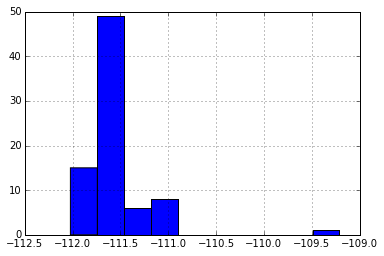

In [50]:
%matplotlib inline
df[df.lon < 0].lon.hist()

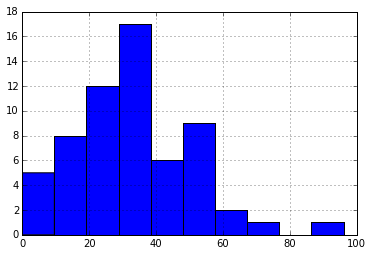

In [51]:
df.depth_inches.hist()

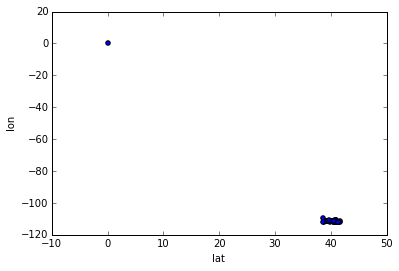

In [52]:
df.plot.scatter('lat', 'lon')

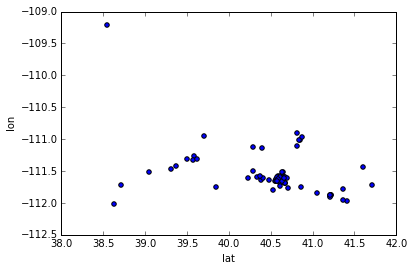

In [53]:
df[df.lat > 0].plot.scatter('lat', 'lon')

In [54]:
import gmaps # pip install gmaps

<IPython.core.display.Javascript object>

In [55]:
gmaps.heatmap([x for x in zip(df.lat, df.lon)])

In [56]:
gmaps.heatmap([x for x in zip(df.lat, df.lon) if str(x[0]) != 'nan'])

In [57]:
gmaps.heatmap([x for x in zip(df.lat, df.lon) if str(x[0]) != 'nan'],
             max_intensity=1)

In [59]:
import folium # pip install folium
from IPython.display import HTML

In [60]:
def inline_map(map):
    map._build_map()
    return HTML('<iframe srcdoc="{}" style="width:100%; height: 500px;"></iframe>'.format(
        map.HTML.replace('"', '&quot;')))

def summary(i, row):
    return '''<b>{} {} {} {}</b
    <p>{}</p>'''.format(i, row['year'], row['Trigger'], row['Location Name or Route'],
                       row['Accident and Rescue Summary'])

center = [40.5, -111.5]
map = folium.Map(location=center, zoom_start=10, tiles='Stamen Terrain', height=700)
for i, row in df.iterrows():
    if str(row.lat) == 'nan' or row.lat == 0:
        continue
    map.simple_marker([row.lat, row.lon], popup=summary(i, row))

inline_map(map)
